In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [4]:
outdir = "output"
pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)

### k-NN Algorithm

In [5]:
def generate_cluster(n_samples, n_features, cluster_std, center):
    return np.random.randn(n_samples, n_features) * cluster_std + center

# Find the distances of these points to all the samples from the training set.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

# Plot k-NN demo plot
def plot_knn_demo(ax, Xdf, xnew, distcol, ylabel=True, xlabel=True, allaxis=True):
    linecolor = ['tab:blue', 'tab:red', 'tab:green']
    ax.scatter(Xdf[Xdf['cluster'] == 0]['x1'], Xdf[Xdf['cluster'] == 0]['x2'],
            edgecolors='tab:blue', facecolors='white', s=40, alpha=0.75)
    ax.scatter(Xdf[Xdf['cluster'] == 1]['x1'], Xdf[Xdf['cluster'] == 1]['x2'],
            edgecolors='tab:red', facecolors='white', s=40, alpha=0.75)
    ax.scatter(Xdf[Xdf['cluster'] == 2]['x1'], Xdf[Xdf['cluster'] == 2]['x2'],
            edgecolors='tab:green', facecolors='white', s=40, alpha=0.75)

    # A new point as a filled back square maker with black edge
    # Sort the samples by distance to the new point
    Xdf = Xdf.sort_values(distcol)
    # Draw lines to the 5 closest samples, with the color of the line matching the 
    # color of cluster
    for i in range(5):
        x = Xdf.iloc[i]
        ax.plot([x['x1'], xnew[0]], [x['x2'], xnew[1]], c=linecolor[int(x['cluster'])],
                linestyle='-', lw=1)
    ax.scatter(xnew[0], xnew[1], edgecolors='black', facecolors='black', s=50, marker='s')
    if allaxis:
        if xlabel:
            ax.set_xlabel('Feature 1', fontsize=15)
        ax.set_xticklabels([])
        if ylabel:
            ax.set_ylabel('Feature 2', fontsize=15)
        ax.set_yticklabels([])
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('gray')
        ax.spines['left'].set_color('gray')

        # Increase ticks label size
        ax.tick_params(axis='both', which='major', labelsize=15)
    else:
        # Remove the axis and the framec completely.
        ax.axis('off')    
    return

In [155]:
# Generate data
np.random.seed(2)
n_clusters = 3
n_samples = 25
n_features = 2
cluster_std = np.array([0.8, 1.0, 1.2])
centers = np.array([[2, 2], [-2, -1], [2.5, -2.5]])
X = np.array([
    generate_cluster(n_samples, n_features, cluster_std[i], centers[i])
    for i in range(n_clusters)
])


nc = len(X)
ns = len(X[0])
Xorg = np.zeros((nc * ns, 3))
Xorg[:ns, 0:2] = X[0]
Xorg[:ns, 2] = 0
Xorg[ns:2*ns, 0:2] = X[1]
Xorg[ns:2*ns, 2] = 1
Xorg[2*ns:3*ns, 0:2] = X[2]
Xorg[2*ns:3*ns, 2] = 2

# Form a dataframe
Xdf = pd.DataFrame(Xorg, columns=['x1', 'x2', 'cluster'])

In [156]:
xnew1 = np.array([-2.5, 2])
xnew2 = np.array([0.5, -0.25])
xnew3 = np.array([1.5, -0.5])

# Add distance to the new points
Xdf['d1'] = euclidean_distance(Xdf.loc[:, ['x1', 'x2']].values, xnew1)
Xdf['d2'] = euclidean_distance(Xdf.loc[:, ['x1', 'x2']].values, xnew2)
Xdf['d3'] = euclidean_distance(Xdf.loc[:, ['x1', 'x2']].values, xnew3)

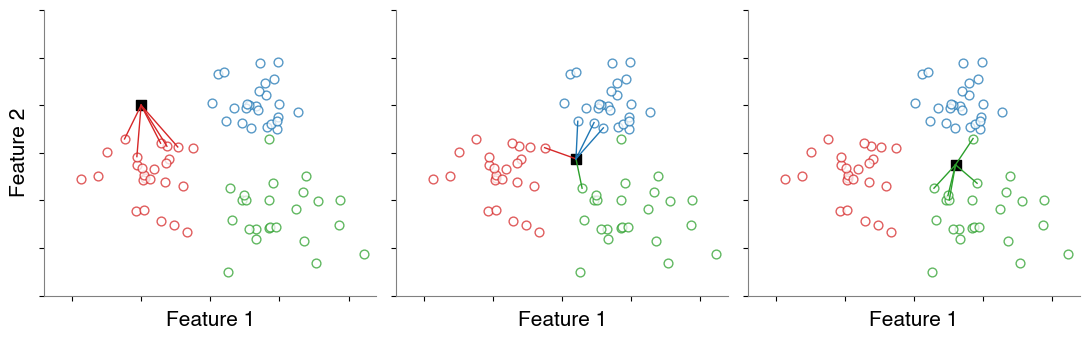

In [170]:
fig = plt.figure(figsize=(11, 3.5))

# New point 1
ax = fig.add_subplot(131)
plot_knn_demo(ax, Xdf, xnew1, distcol='d1', allaxis=True)

# New point 2
ax = fig.add_subplot(132)
plot_knn_demo(ax, Xdf, xnew2, distcol='d2', ylabel=False, allaxis=True)

# New point 3
ax = fig.add_subplot(133)
plot_knn_demo(ax, Xdf, xnew3, distcol='d3', ylabel=False, allaxis=True)

plt.tight_layout()

# Save the figure as svg, pdf, and png
plt.savefig(f"{outdir}/knn.svg", bbox_inches='tight')
plt.savefig(f"{outdir}/knn.pdf", bbox_inches='tight')
plt.savefig(f"{outdir}/knn.png", bbox_inches='tight', dpi=300)

In [252]:
def get_knn_pred(Xregdf, k, xnew):
    Xregdf['d'] = np.abs(Xregdf['x'] - xnew)
    Xregdf = Xregdf.sort_values('d')
    return Xregdf.iloc[:k]['y'].mean() 

In [274]:
# Generate a a random polynomial function
np.random.seed(2)
n_samples = 100
x = np.random.randn(n_samples) * 4
y = 0.1 * x ** 3 - 0.5 * x ** 2 - 2 * x + 3 + np.random.randn(n_samples) * 6
Xregdf = pd.DataFrame({'x': x, 'y': y})
Xregdf['d'] = 0

In [286]:
# Y prediction
xpred = np.linspace(-10, 10, 100)

# Compute predictions
ypred = np.array([get_knn_pred(Xregdf, k=5, xnew=x) for x in xpred])

# Sample xnew
xnew = 7.5
Xregdf['d'] = np.abs(Xregdf['x'] - xnew)
Xregdf = Xregdf.sort_values('d')

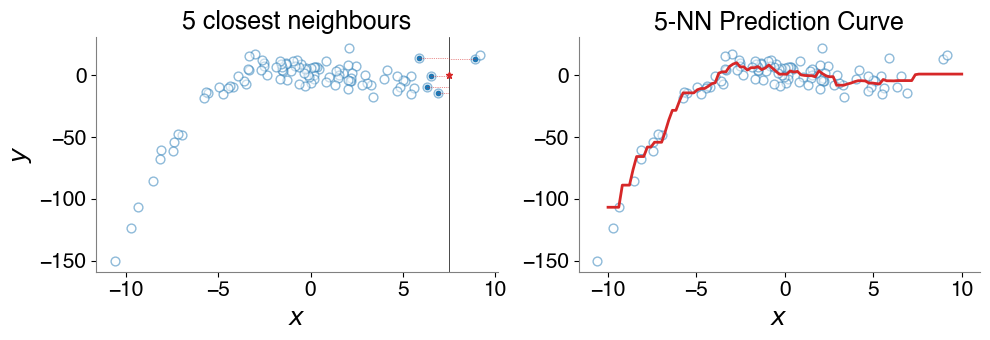

In [302]:
fig = plt.figure(figsize=(10, 3.5))

# New point 1
ax = fig.add_subplot(121)
ax.scatter(Xregdf['x'], Xregdf['y'], edgecolors='tab:blue',
           facecolors='white', s=40, alpha=0.5)
ax.axvline(x=xnew, c='black', lw=0.5)
# Highlight the k closest neighbours
for i in range(5):
    x = Xregdf.iloc[i]
    ax.scatter(x['x'], x['y'], facecolor="tab:blue", s=40, marker='.')
    ax.plot([x['x'], xnew], [x['y'], x['y']], c='tab:red', linestyle=':', lw=0.5)
# Plot the mean value of the k closest neighbours
ax.plot(xnew, Xregdf.iloc[:5]['y'].mean(), c='tab:red', marker='*', markersize=5)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('5 closest neighbours', fontsize=18)

ax = fig.add_subplot(122)
ax.scatter(Xregdf['x'], Xregdf['y'], edgecolors='tab:blue',
           facecolors='white', s=40, alpha=0.5)
ax.plot(xpred, ypred, c='tab:red', lw=2)
ax.set_xlabel('$x$', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('5-NN Prediction Curve', fontsize=18)

plt.tight_layout()

# Save the figure as svg, pdf, and png
plt.savefig(f"{outdir}/knn-reg.svg", bbox_inches='tight')
plt.savefig(f"{outdir}/knn-reg.pdf", bbox_inches='tight')
plt.savefig(f"{outdir}/knn-reg.png", bbox_inches='tight', dpi=300)

### k-means algorithm

In [22]:
def get_cluster_id(m, xnew):
    return np.argmin(np.linalg.norm(m - xnew, axis=1))

# k-means clustering algorithm
def get_k_means(Xdf, k, n_iter):
    # Randomly initialize the centroids
    m = np.random.randn(k, 2) * 4
    for i in range(n_iter):
        # Assign each point to the closest centroid
        Xdf['cluster'] = Xdf.apply(lambda x: get_cluster_id(m, x[['x1', 'x2']]), axis=1)
        # Update the centroids
        m = np.array([Xdf[Xdf['cluster'] == i][['x1', 'x2']].mean() for i in range(k)])
    return m

In [62]:
# Generate data
np.random.seed(2)
n_clusters = 3
n_samples = 25
n_features = 2
cluster_std = np.array([0.8, 1.0, 1.2])
centers = np.array([[2, 2], [-2, -1], [2.5, -2.5]])
X = np.array([
    generate_cluster(n_samples, n_features, cluster_std[i], centers[i])
    for i in range(n_clusters)
])

nc = len(X)
ns = len(X[0])
Xorg = np.zeros((nc * ns, 3))
Xorg[:ns, 0:2] = X[0]
Xorg[:ns, 2] = 0
Xorg[ns:2*ns, 0:2] = X[1]
Xorg[ns:2*ns, 2] = 1
Xorg[2*ns:3*ns, 0:2] = X[2]
Xorg[2*ns:3*ns, 2] = 2

# Form a dataframe
Xdf = pd.DataFrame(Xorg, columns=['x1', 'x2', 'cluster'])

In [63]:
k = 3
# Random cluster means
m = np.array([[-2, 1],
              [3, 0],
              [0, -2]])

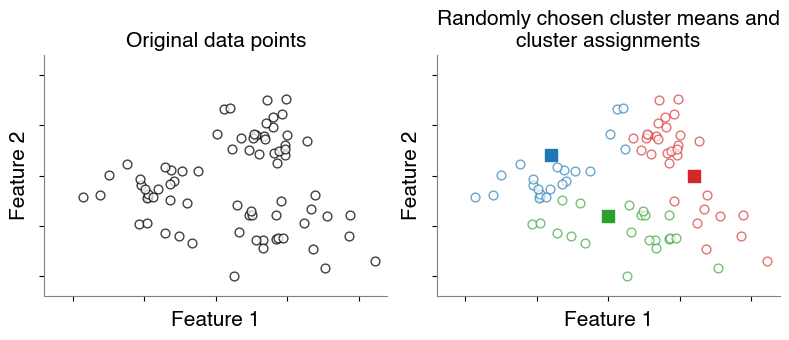

In [112]:
fig = plt.figure(figsize=(8, 3.5))

ax = fig.add_subplot(121)
ax.scatter(Xdf['x1'], Xdf['x2'],
            edgecolors='black', facecolors='white', s=40, alpha=0.75)

ax.set_xlabel('Feature 1', fontsize=15)
ax.set_xticklabels([])
ax.set_ylabel('Feature 2', fontsize=15)
ax.set_yticklabels([])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title("Original data points", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(122)
clustcolors = ['tab:blue', 'tab:red', 'tab:green']
# cluster IDS
_cids = np.array([get_cluster_id(m, _xn) for _xn in Xdf.values[:, :2]])
ax.scatter(Xdf['x1'][_cids == 0], Xdf['x2'][_cids == 0],
            edgecolors=clustcolors[0], facecolors='white', s=40, alpha=0.65)
ax.scatter(Xdf['x1'][_cids == 1], Xdf['x2'][_cids == 1],
            edgecolors=clustcolors[1], facecolors='white', s=40, alpha=0.65)
ax.scatter(Xdf['x1'][_cids == 2], Xdf['x2'][_cids == 2],
            edgecolors=clustcolors[2], facecolors='white', s=40, alpha=0.65)

# Plot the cluster means
for i in range(3):
    ax.scatter(m[i, 0], m[i, 1], edgecolors=clustcolors[i],
               facecolors=clustcolors[i], s=70, marker='s')

ax.set_xlabel('Feature 1', fontsize=15)
ax.set_xticklabels([])
ax.set_ylabel('Feature 2', fontsize=15)
ax.set_yticklabels([])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title("Randomly chosen cluster means and\ncluster assignments", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

# Save the figure as svg, pdf, and png
plt.savefig(f"{outdir}/kmeans-demo.svg", bbox_inches='tight')
plt.savefig(f"{outdir}/kmeans-demo.pdf", bbox_inches='tight')
plt.savefig(f"{outdir}/kmeans-demo.png", bbox_inches='tight', dpi=300)


In [122]:
# Randomly initialize the centroids
n_iter = 20
_m = np.random.randn(n_iter, k, 2)
_cids = np.zeros((len(Xdf), n_iter))
for i in range(1, n_iter):
    # Computer cluster IDs
    _cids[:, i-1] = np.array([get_cluster_id(_m[i - 1], x[:2]) for x in Xdf.values])
    # Update the centroids
    _m[i] = np.array([Xdf[_cids[:, i-1] == j][['x1', 'x2']].mean() for j in range(k)])
_cids[:, i] = np.array([get_cluster_id(_m[i], x[:2]) for x in Xdf.values])

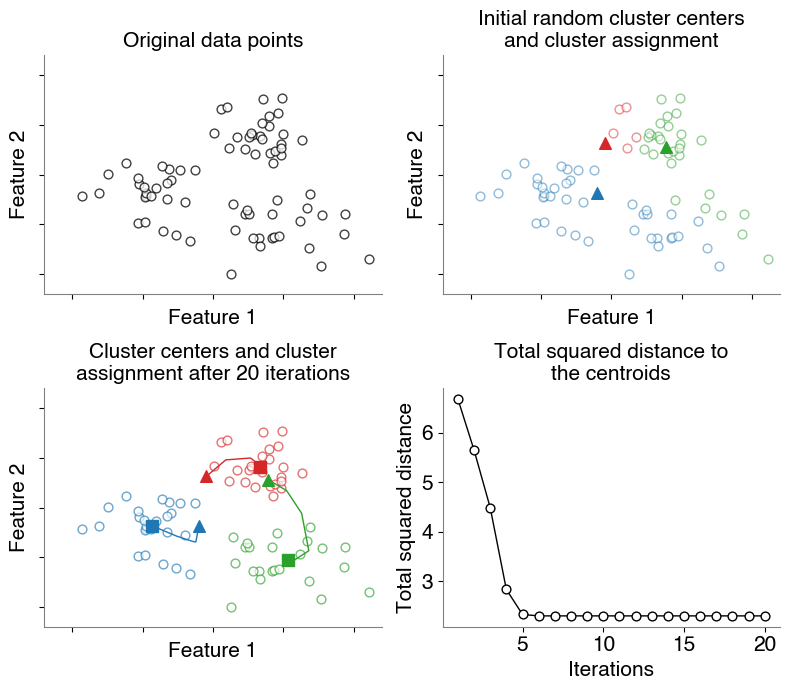

In [125]:
fig = plt.figure(figsize=(8, 7))

ax = fig.add_subplot(221)
ax.scatter(Xdf['x1'], Xdf['x2'],
            edgecolors='black', facecolors='white', s=40, alpha=0.75)

ax.set_xlabel('Feature 1', fontsize=15)
ax.set_xticklabels([])
ax.set_ylabel('Feature 2', fontsize=15)
ax.set_yticklabels([])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title("Original data points", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(222)
clustcolors = ['tab:blue', 'tab:red', 'tab:green']
# cluster IDS
ax.scatter(Xdf['x1'][_cids[:, 0] == 0], Xdf['x2'][_cids[:, 0] == 0],
            edgecolors=clustcolors[0], facecolors='white', s=40, alpha=0.5)
ax.scatter(Xdf['x1'][_cids[:, 0] == 1], Xdf['x2'][_cids[:, 0] == 1],
            edgecolors=clustcolors[1], facecolors='white', s=40, alpha=0.5)
ax.scatter(Xdf['x1'][_cids[:, 0] == 2], Xdf['x2'][_cids[:, 0] == 2],
            edgecolors=clustcolors[2], facecolors='white', s=40, alpha=0.5)

# Plot the cluster means
for i in range(3):
    ax.scatter(_m[0, i, 0], _m[0, i, 1], edgecolors=clustcolors[i],
               facecolors=clustcolors[i], s=70, marker='^')

ax.set_xlabel('Feature 1', fontsize=15)
ax.set_xticklabels([])
ax.set_ylabel('Feature 2', fontsize=15)
ax.set_yticklabels([])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title("Initial random cluster centers\nand cluster assignment", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(223)
clustcolors = ['tab:blue', 'tab:red', 'tab:green']
# cluster IDS
ax.scatter(Xdf['x1'][_cids[:, -1] == 0], Xdf['x2'][_cids[:, -1] == 0],
           edgecolors=clustcolors[0], facecolors='white', s=40, alpha=0.65)
ax.scatter(Xdf['x1'][_cids[:, -1] == 1], Xdf['x2'][_cids[:, -1] == 1],
           edgecolors=clustcolors[1], facecolors='white', s=40, alpha=0.65)
ax.scatter(Xdf['x1'][_cids[:, -1] == 2], Xdf['x2'][_cids[:, -1] == 2],
           edgecolors=clustcolors[2], facecolors='white', s=40, alpha=0.65)

# Plot the cluster means
for i in range(3):
    ax.scatter(_m[0, i, 0], _m[0, i, 1], edgecolors=clustcolors[i],
               facecolors=clustcolors[i], s=70, marker='^')
    ax.scatter(_m[-1, i, 0], _m[-1, i, 1], edgecolors=clustcolors[i],
               facecolors=clustcolors[i], s=70, marker='s')
# Plot the means trajectory
for i in range(3):
    ax.plot(_m[:, i, 0], _m[:, i, 1], c=clustcolors[i], lw=1)

ax.set_xlabel('Feature 1', fontsize=15)
ax.set_xticklabels([])
ax.set_ylabel('Feature 2', fontsize=15)
ax.set_yticklabels([])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title(f"Cluster centers and cluster\nassignment after {n_iter:2d} iterations", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(224)
# Squared distance to the cluster centers
sqrdist = np.array([[
    np.sum(np.square(Xdf.loc[_cids[:, i] == j, ['x1', 'x2']].values - _m[i, j, :])) 
    for j in range(3)]
    for i in range(n_iter)
]) * (1 / (n_samples * n_clusters))
ax.plot(np.arange(n_iter) + 1, np.sum(sqrdist, axis=1), c="black", lw=1, zorder=1)
ax.scatter(np.arange(n_iter) + 1, np.sum(sqrdist, axis=1),
           edgecolors="black", facecolors='white', s=40, marker="o", zorder=2)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_ylabel('Total squared distance', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.set_title(f"Total squared distance to\nthe centroids", fontsize=15)

# Increase ticks label size
ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

# Save the figure as svg, pdf, and png
plt.savefig(f"{outdir}/kmeans-algo.svg", bbox_inches='tight')
plt.savefig(f"{outdir}/kmeans-algo.pdf", bbox_inches='tight')
plt.savefig(f"{outdir}/kmeans-algo.png", bbox_inches='tight', dpi=300)


### Vector Space Sickness Data

In [179]:
# Participants with vector space sickness
_x1 = np.random.randn(100, 2)
_x1 += np.array([15, 15])

# Participants without vector space sickness
_x2 = np.random.randn(100, 2)
_x2 = _x2 + np.array([10, 10])

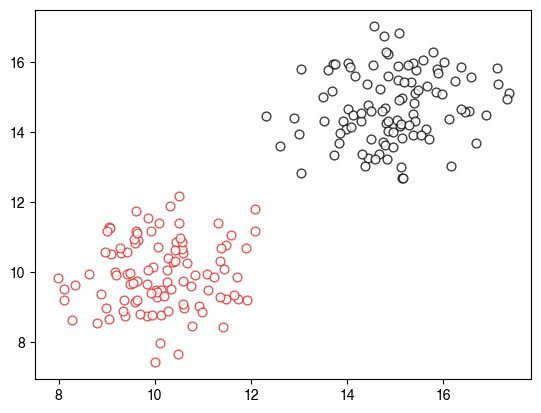

In [181]:
plt.scatter(_x1[:, 0], _x1[:, 1], edgecolors='black', facecolors='white', s=40, alpha=0.75)
plt.scatter(_x2[:, 0], _x2[:, 1], edgecolors='tab:red', facecolors='white', s=40, alpha=0.75)

In [182]:
# Save file as a csv file.
df = pd.DataFrame(np.vstack((_x1, _x2)), columns=['x1', 'x2'])
df["vss"] = np.hstack((np.ones(100), np.zeros(100)))
# vss is an integer column
df["vss"] = df["vss"].astype(int)
# Randomize the order of the rows
df = df.sample(frac=1)
df["subjectno"] = np.arange(200)
# Save file
df.to_csv(f"{outdir}/expt1.csv", index=False)